In [1]:
## Linear Regression 

# Pandas
import pandas as pd
# Numpy
import numpy as np
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Train-test split
from sklearn.model_selection import train_test_split
# Min-max scling
from sklearn.preprocessing import MinMaxScaler
# Statsmodel 
import statsmodels.api as sm
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#R-squared
from sklearn.metrics import r2_score
# Importing RFE
from sklearn.feature_selection import RFE
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
# Supress warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Step 1:- Reading and understanding the data

In [3]:
# Read the data
df_car = pd.read_csv("CarPriceRegression.csv")
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_car.shape


(205, 26)

In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [8]:
# Spliting the "Car company" from "CarName"

In [9]:
car_company = df_car["CarName"].str.split(" ", n = 1, expand = True)
df_car['CarCompany'] = car_company[0]

# Dropping 'CarName' column
df_car.drop('CarName',axis=1,inplace=True)
df_car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
# Dropping car_ID column as it will not be used in our analysis
df_car.drop('car_ID',axis=1,inplace=True)

In [10]:
# Handaling missing values in columns

In [12]:
# Count missing values column wise
df_car.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarCompany          0
dtype: int64

In [13]:
#Replacing '4wd' with 'fwd' in 'drivewheel' column
df_car['drivewheel'] = df_car['drivewheel'].replace('4wd','fwd')
# Replacing 'maxda' with 'mazda' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('maxda','mazda')
# Replacing 'porcshce' with 'porsche' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('porcshce','porsche')
# Replacing 'toyouta' with 'toyota' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('toyouta','toyota')
# Replacing 'vokswagen' with 'volkswagen' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('vokswagen','volkswagen')
# Replacing 'Nisaan' with 'nissan' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('Nissan','nissan')
# Replacing 'vw' with 'volkswagen' in 'CarCompany' column
df_car['CarCompany'] = df_car['CarCompany'].replace('vw','volkswagen')

In [14]:
# Handling outliers

In [15]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_numeric = ['wheelbase','carlength','carwidth','carheight','curbweight',
                    'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

for col in col_numeric: 
    q1 = df_car[col].quantile(0.25)
    q3 = df_car[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_car = df_car.loc[(df_car[col] > range_low) & (df_car[col] < range_high)]

df_car.shape

(123, 25)

In [16]:
# Checking Data Imbalance

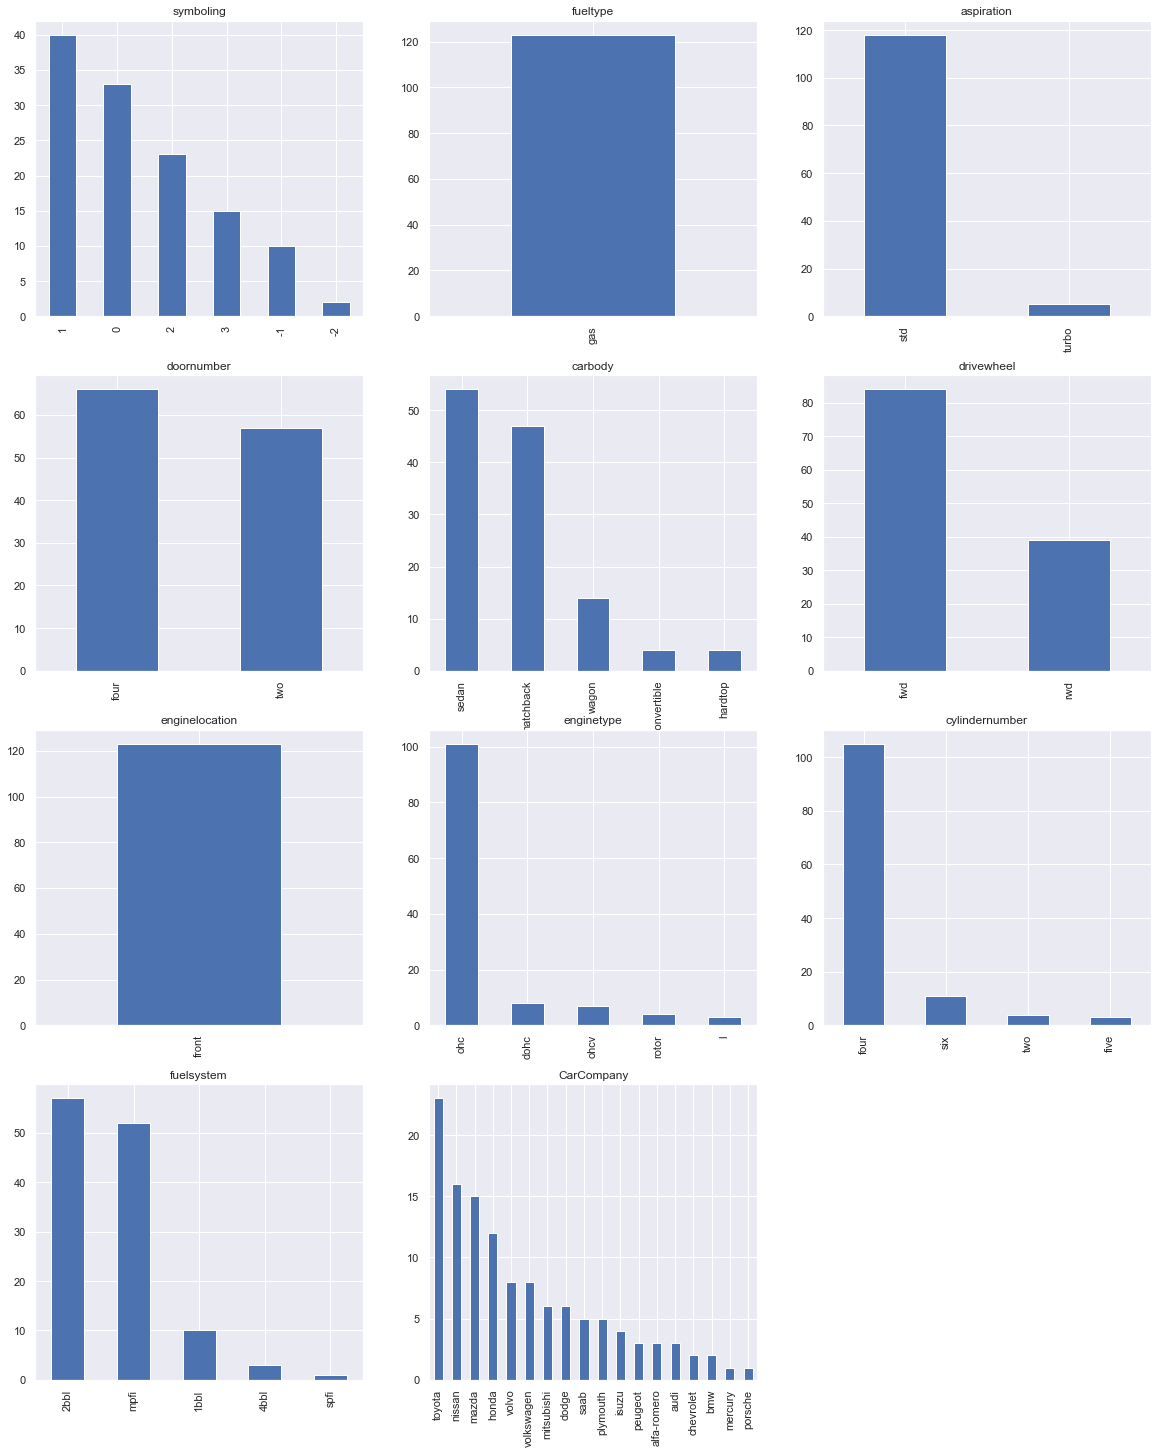

In [17]:
# Listing categorical columns for checking data imbalance and plotting them
col_category = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
           'cylindernumber','fuelsystem','CarCompany']

k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    df_car[col].value_counts().plot(kind='bar');
    plt.title(col)

Observations

We can see that there is data imbalance in below columns:-

symboling - There are very few with rating -2.
fuletype - All the cars fule type is Gas, as Diesel cars were removed while removing outliers..
aspiration - Lesser number of turbo than std.
engineloaction - All the engine location is in front, as all the rear engine cars were removed while removing outliers.
enginetype - Considerably more number of ohc than others.
cylindernumber - Large number of four cyliners than others.
fulesystem - mpfi and 2bbl fulesystem cars are more comparitavely others.
CarCompany - Most of the Toyata company cars were surveyed.

In [18]:
# Visualising the data to check the possiblity of linear regression model

<Figure size 864x864 with 0 Axes>

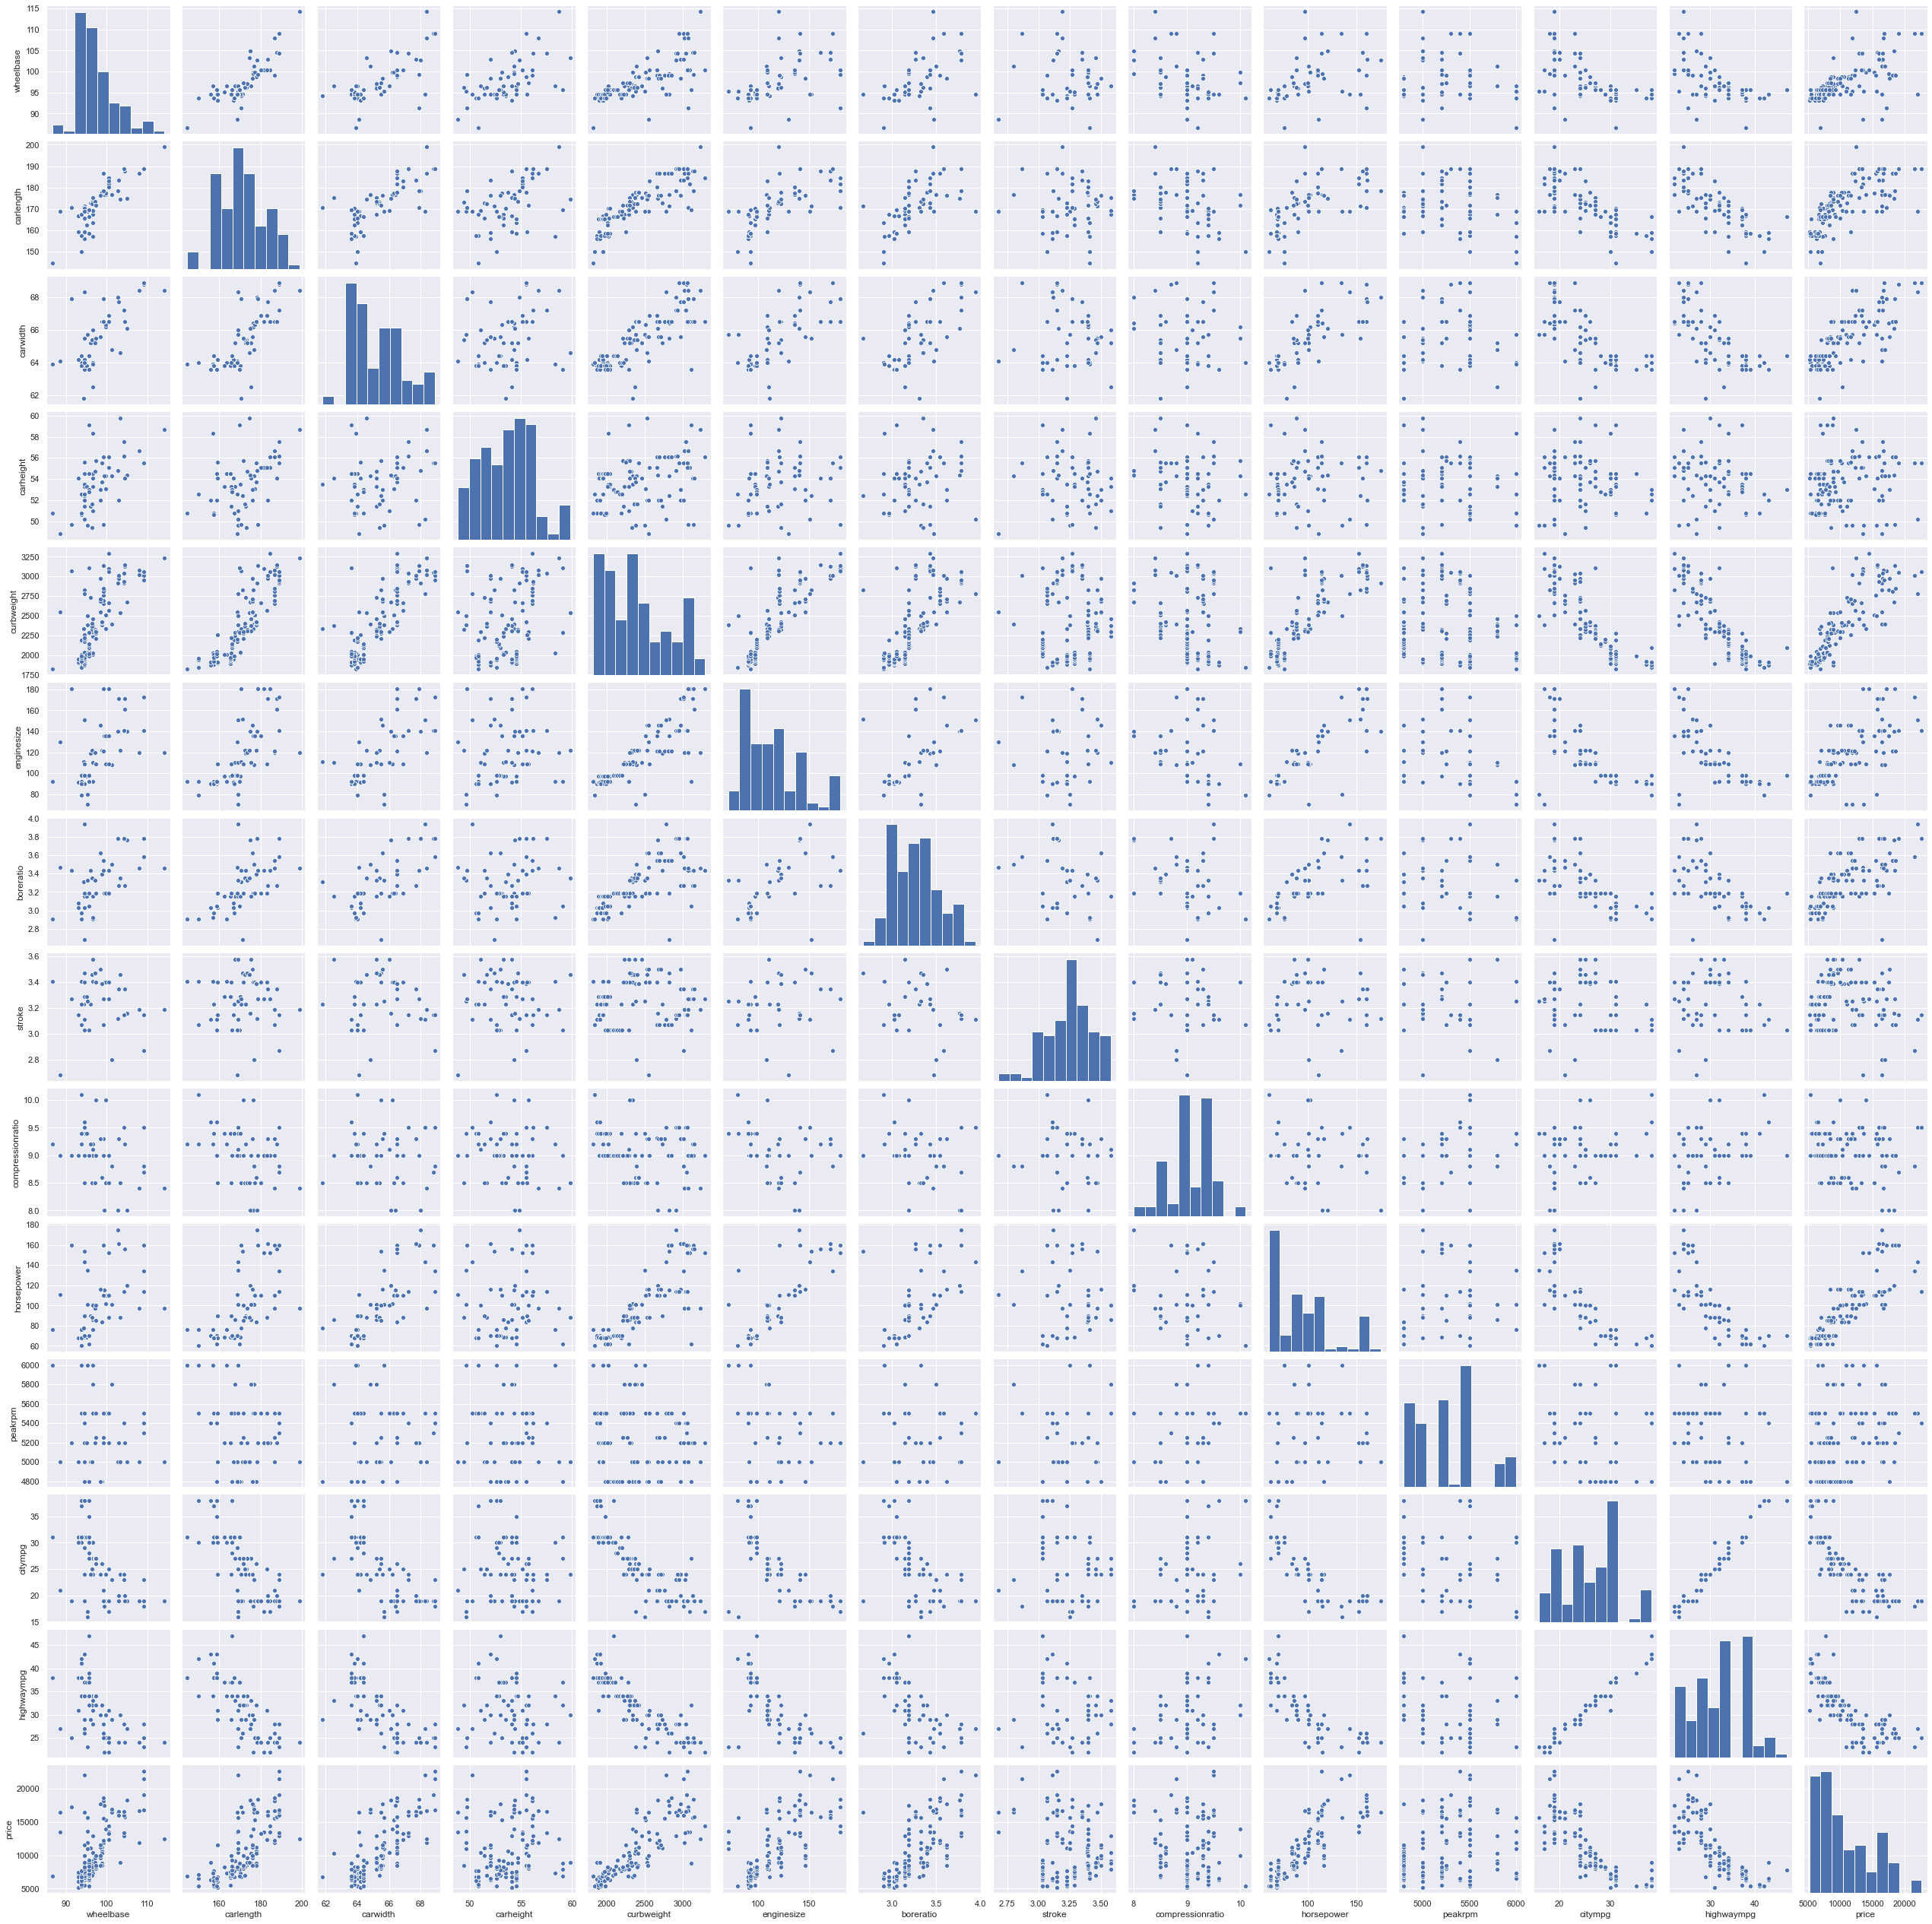

In [19]:
# Visualising the numerical variables
plt.figure(figsize=(12,12))
sns.pairplot(df_car[col_numeric])
plt.show()

In [ ]:
# Visualising the categorical variables

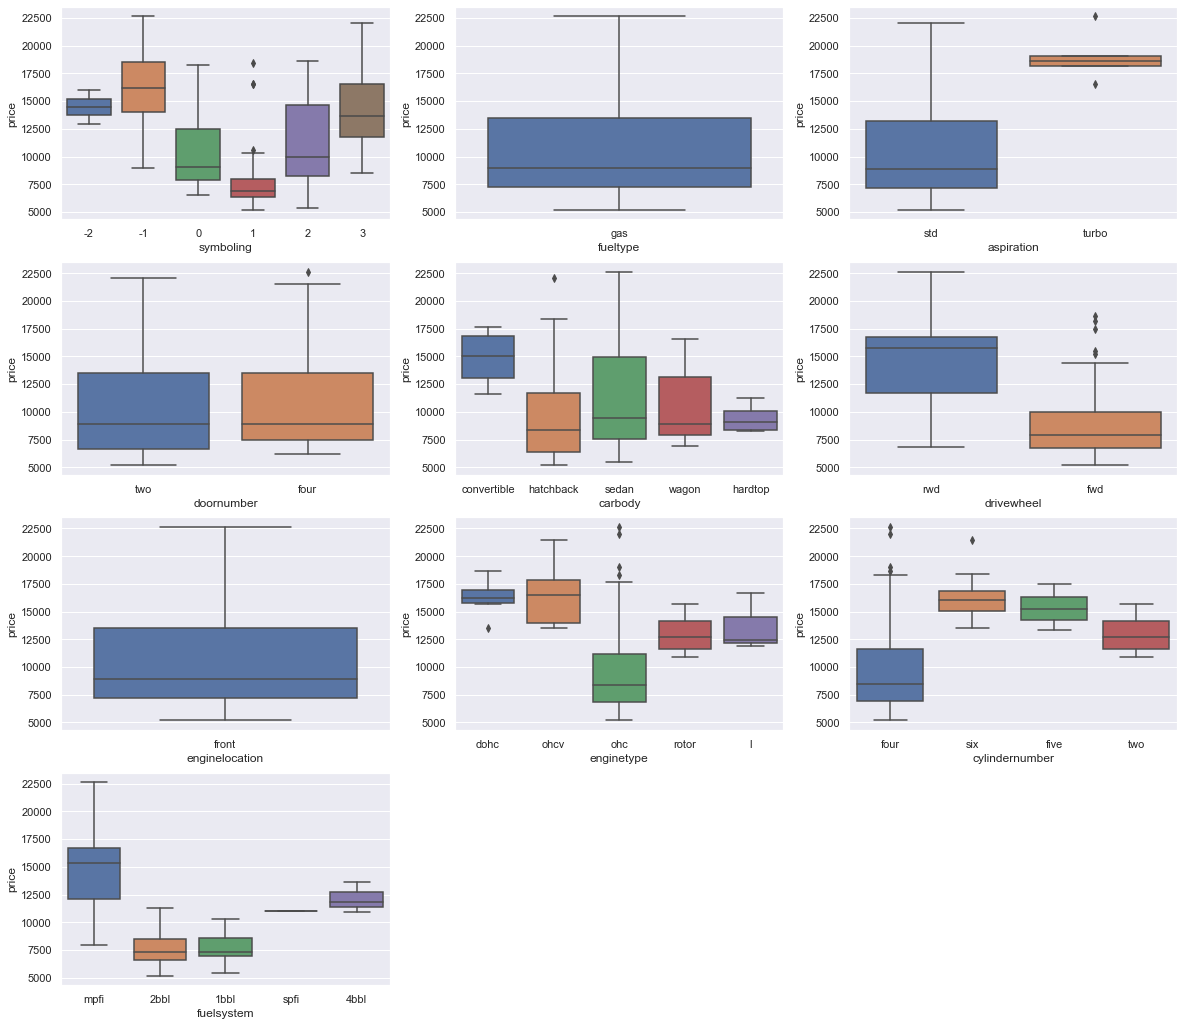

In [20]:
# Boxplot for all categorical variables except CarCompany
# As X labels are not clearly visible for CarCompany. It is plotted in the next cell with bigger figure size.
k=0
plt.figure(figsize=(20,18))
for col in range (len(col_category)-1):    
    k=k+1
    plt.subplot(4, 3, k)   
    ax = sns.boxplot(x = col_category[col], y = 'price', data = df_car)

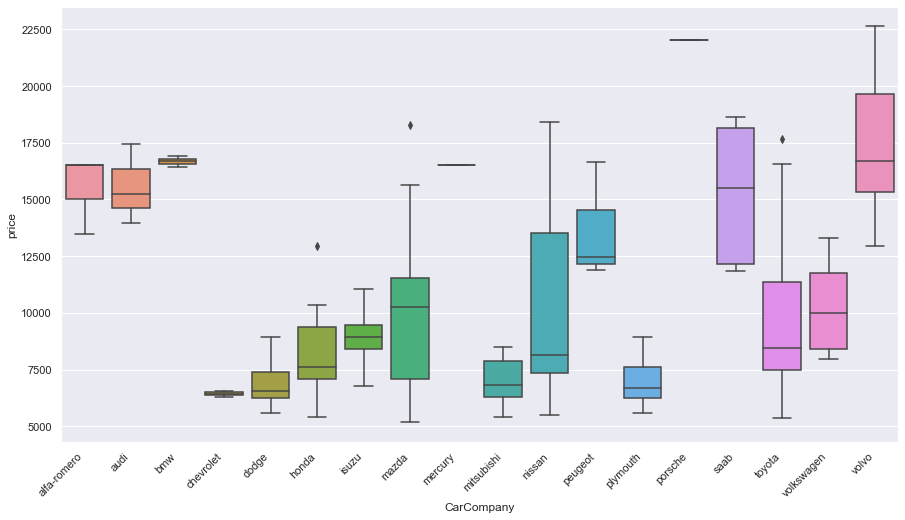

In [21]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'CarCompany', y = 'price', data = df_car)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Observations

CarCompany - Porsche has very high median price compared to other cars,though the number of Porsche cars is very less. Volvo, alfa-romero, audi and BMW are also high median price than others. Saab has wide rage of price, with high median price.
aspiration - std has lower median than turbo.
carbody - convertible has higher median that others.
symboling - -2 and -1 have higher median price than others.
enginelocation - rear has very high median price than fromt.
cylindernumber - Four has lower median than others.
fulesystem - 1bbl and 2bbl have lower median price than others.
Now atleast we know that what are the variables have impact on the price. So as which variables are important for the model building.

In [ ]:
# Step 2:- Preparing the data for model building

Encoding
Converting categorical variables (fueltype, aspiration, doornumber, drivewheel, enginelocation) with two levels to binary variables

In [22]:
# fueltype
# Convert "gas" to 1 and "diesel" to 0
df_car['fueltype'] = df_car['fueltype'].map({'gas': 1, 'diesel': 0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [23]:
# aspiration
# Convert "std" to 1 and "turbo" to 0
df_car['aspiration'] = df_car['aspiration'].map({'std':1, 'turbo':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [24]:
# doornumber
# Convert "four" to 1 and "two" to 0
df_car['doornumber'] = df_car['doornumber'].map({'four':1, 'two':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [25]:
# drivewheel
# Convert "fwd" to 1 and "rwd" to 0
df_car['drivewheel'] = df_car['drivewheel'].map({'fwd':1, 'rwd':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,0,convertible,0,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,0,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,0,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,1,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,1,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [26]:
# enginelocation
# Convert "front" to 1 and "rear" to 0
df_car['enginelocation'] = df_car['enginelocation'].map({'front':1, 'rear':0})
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Dummy variables
Converting other categorical variables with more than two levels to dummy variables. We have to create (n-1) dummy variables by removing the base status. n is the number of levels of the variables.

In [ ]:
# symboling

In [27]:
# Creating dummy variables for 'symboling'
# Dropping the redundant dummy variable (-2)
symboling_status = pd.get_dummies(df_car['symboling'],drop_first=True)
symboling_status.head()

,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [28]:
# Renaming column names for better readability
symboling_status = symboling_status.rename(columns={-1:'symboling(-1)', 0:'symboling(0)', 1:'symboling(1)',2:'symboling(2)', 3:'symboling(3)'})
symboling_status.head()

,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [29]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,symboling_status], axis=1)
df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,3,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1
1,3,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1
2,1,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0
3,2,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0
4,2,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0


In [30]:
# Dropping the 'symboling' column as we don't need it anymore
df_car = df_car.drop('symboling',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1
1,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1
2,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0
3,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0
4,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0


In [31]:
# carbody

In [32]:
# Creating dummy variables for 'carbody'
# Dropping the redundant dummy variable (convertible)
carbody_status = pd.get_dummies(df_car['carbody'],drop_first=True)
carbody_status.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [33]:
# Renaming column names for better readability
carbody_status = carbody_status.rename(columns={'hardtop':'carbody(hardtop)', 'hatchback':'carbody(hatchback)', 'sedan':'carbody(sedan)','wagon':'carbody(wagon)'})
carbody_status.head()

,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [34]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,carbody_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0
1,1,1,0,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0
2,1,1,0,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0
3,1,1,1,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0
4,1,1,1,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0


In [35]:
df_car.shape

(123, 33)

In [36]:
# Dropping the 'symboling' column as we don't need it
df_car = df_car.drop('carbody',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0


In [37]:
# engineType

In [38]:
# Creating dummy variables for 'enginetype'
# Dropping the redundant dummy variable (dohc)
enginetype_status = pd.get_dummies(df_car['enginetype'], drop_first=True)
enginetype_status.head()

,l,ohc,ohcv,rotor
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [39]:
# Renaming column name for better readability
enginetype_status = enginetype_status.rename(columns={'dohcv':'enginetype(dohcv)', 'l':'enginetype(l)', 'ohc':'enginetype(ohc)', 
                                                      'ohcf':'enginetype(ohcf)','ohcv':'enginetype(ohcv)' ,'rotor':'enginetype(rotor)'})
enginetype_status.head()

,enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [40]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,enginetype_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0


In [41]:
# Dropping the 'enginetype' column as we don't need it
df_car = df_car.drop('enginetype',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0


In [42]:
# cylindernumber

# Creating dummy variables for 'cylindernumber'
# Dropping the redundant dummy variable (eight)
cylindernumber_status = pd.get_dummies(df_car['cylindernumber'], drop_first=True)
cylindernumber_status.head()

,four,six,two
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,0


In [43]:
# Renaming column name for better readability
cylindernumber_status = cylindernumber_status.rename(columns={'five':'cylindernumber(five)', 'four':'cylindernumber(four)', 'six':'cylindernumber(six)', 
                                                      'three':'cylindernumber(three)','twelve':'cylindernumber(twelve)' ,'two':'cylindernumber(two)'})
cylindernumber_status.head()

,cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,0


In [44]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,cylindernumber_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [45]:
# Dropping the 'cylindernumber' column as we don't need it
df_car = df_car.drop('cylindernumber',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [46]:
# Creating dummy variables for 'fuelsystem'
# Dropping the redundant dummy variable (1bbl)
fuelsystem_status = pd.get_dummies(df_car['fuelsystem'], drop_first=True)
fuelsystem_status.head()

,2bbl,4bbl,mpfi,spfi
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [47]:
# Renaming column name for better readability
fuelsystem_status = fuelsystem_status.rename(columns={'2bbl':'fuelsystem(2bbl)', '4bbl':'fuelsystem(4bbl)', 'idi':'fuelsystem(idi)', 
                                                      'mfi':'fuelsystem(mfi)','mpfi':'fuelsystem(mpfi)' ,'spdi':'fuelsystem(spdi)',
                                                             'spfi':'fuelsystem(spfi)'})
fuelsystem_status.head()

,fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [48]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,fuelsystem_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [49]:
# Dropping the 'fuelsystem' column as we don't need it
df_car = df_car.drop('fuelsystem',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [50]:
# Creating dummy variables for 'CarCompany'
# Dropping the redundant dummy variable (alfa-romero)
CarCompany_status = pd.get_dummies(df_car['CarCompany'], drop_first=True)
CarCompany_status.head()

,audi,bmw,chevrolet,dodge,honda,isuzu,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,saab,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# Renaming column name for better readability
CarCompany_status = CarCompany_status.rename(columns={'audi':'CarCompany(audi)', 'bmw':'CarCompany(bmw)', 'buick':'CarCompany(buick)', 
                                                      'chevrolet':'CarCompany(chevrolet)','dodge':'CarCompany(dodge)' ,'honda':'CarCompany(honda)',
                                                      'isuzu':'CarCompany(isuzu)','jaguar':'CarCompany(jaguar)','mazda':'CarCompany(mazda)',
                                                      'mercury':'CarCompany(mercury)','mitsubishi':'CarCompany(mitsubishi)','nissan':'CarCompany(nissan)',
                                                      'peugeot':'CarCompany(peugeot)','plymouth':'CarCompany(plymouth)','porsche':'CarCompany(porsche)',
                                                      'renault':'CarCompany(renault)','saab':'CarCompany(saab)','subaru':'CarCompany(subaru)',
                                                      'toyota':'CarCompany(toyota)','volkswagen':'CarCompany(volkswagen)','volvo':'CarCompany(volvo)'})
                                                    
CarCompany_status.head()

,CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Concating the dummy dataframe with original dataframe
df_car = pd.concat([df_car,CarCompany_status], axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# Dropping the 'CarCompany' column as we don't need it
df_car = df_car.drop('CarCompany',axis=1)
df_car.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
print ('Shape of dataset after all operations: ', df_car.shape)

Shape of dataset after all operations:  (123, 56)


In [55]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 204
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fueltype                123 non-null    int64  
 1   aspiration              123 non-null    int64  
 2   doornumber              123 non-null    int64  
 3   drivewheel              123 non-null    int64  
 4   enginelocation          123 non-null    int64  
 5   wheelbase               123 non-null    float64
 6   carlength               123 non-null    float64
 7   carwidth                123 non-null    float64
 8   carheight               123 non-null    float64
 9   curbweight              123 non-null    int64  
 10  enginesize              123 non-null    int64  
 11  boreratio               123 non-null    float64
 12  stroke                  123 non-null    float64
 13  compressionratio        123 non-null    float64
 14  horsepower              123 non-null    in

In [56]:
# Splitting train and test dataset into 70:30 percent ratio.
df_train, df_test = train_test_split(df_car, train_size=0.7, random_state=100)
print('Shape of Train set', df_train.shape)
print('Shape of Test set',df_test.shape)

Shape of Train set (86, 56)
Shape of Test set (37, 56)


Rescaling the Features with Min-max scaling (Normalization)

In [57]:
# Create a list of numeric variables. We don't need categorical variables because they are already scalled in 0 and 1.
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

# Instantiate an object
scaler = MinMaxScaler()

# Fit the data in the object
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
38,1,1,0,1,1,0.358696,0.421731,0.301887,0.409091,0.318213,0.360360,0.373016,1.000000,0.476190,0.226087,0.833333,0.500000,0.44,0.215015,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
98,1,1,0,1,1,0.307971,0.327808,0.037736,0.409091,0.127962,0.243243,0.373016,0.677778,0.666667,0.078261,0.333333,0.681818,0.60,0.165932,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
180,1,1,1,0,1,0.648551,0.795580,0.547170,0.481818,0.888287,0.909910,0.468254,0.744444,0.571429,0.834783,0.333333,0.181818,0.08,0.597644,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
35,1,1,1,1,1,0.358696,0.346225,0.075472,0.518182,0.129316,0.198198,0.182540,0.811111,0.571429,0.139130,1.000000,0.636364,0.48,0.110583,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
61,1,1,0,1,1,0.442029,0.611418,0.547170,0.445455,0.383209,0.468468,0.563492,0.788889,0.285714,0.208696,0.000000,0.454545,0.40,0.302042,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [58]:
df_train.describe()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
count,86.0,86.00000,86.000000,86.000000,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.000000,86.00000
mean,1.0,0.94186,0.511628,0.709302,1.0,0.378202,0.468393,0.285871,0.415856,0.369464,0.387492,0.456349,0.622545,0.521705,0.293124,0.392926,0.476744,0.417209,0.292751,0.081395,0.244186,0.337209,0.186047,0.139535,0.046512,0.395349,0.418605,0.093023,0.011628,0.825581,0.05814,0.034884,0.872093,0.081395,0.034884,0.511628,0.023256,0.372093,0.011628,0.023256,0.023256,0.023256,0.05814,0.093023,0.023256,0.081395,0.011628,0.069767,0.139535,0.011628,0.05814,0.011628,0.034884,0.197674,0.046512,0.05814
std,0.0,0.23538,0.502797,0.456748,0.0,0.162068,0.198184,0.269247,0.226509,0.273911,0.234993,0.203495,0.218194,0.186002,0.262867,0.299614,0.265295,0.236646,0.251332,0.275045,0.432123,0.475530,0.391427,0.348536,0.211825,0.491793,0.496224,0.292169,0.107833,0.381695,0.23538,0.184561,0.335945,0.275045,0.184561,0.502797,0.151599,0.486198,0.107833,0.151599,0.151599,0.151599,0.23538,0.292169,0.151599,0.275045,0.107833,0.256249,0.348536,0.107833,0.23538,0.107833,0.184561,0.400581,0.211825,0.23538
min,1.0,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.0,1.00000,0.000000,0.000000,1.0,0.286232,0.354972,0.042453,0.240909,0.125931,0.198198,0.293651,0.477778,0.476190,0.078261,0.166667,0.318182,0.240000,0.094860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.0,1.00000,1.000000,1.000000,1.0,0.329710,0.449355,0.188679,0.395455,0.323968,0.346847,0.404762,0.625000,0.500000,0.221739,0.333333,0.500000,0.420000,0.198567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.0,1.00000,1.000000,1.000000,1.0,0.442029,0.587477,0.438679,0.543182,0.549425,0.468468,0.595238,0.800000,0.666667,0.443478,0.583

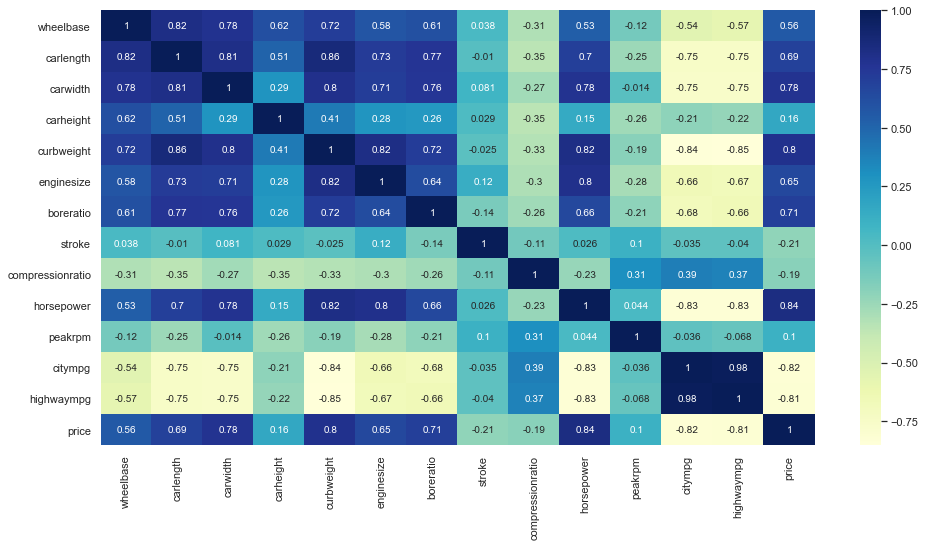

In [59]:
# Step 3:- Training the model¶
#Let's check the correlation coefficients of all numerical variables except categorical variables to see which variables are highly correlated

plt.figure(figsize = (16, 8))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

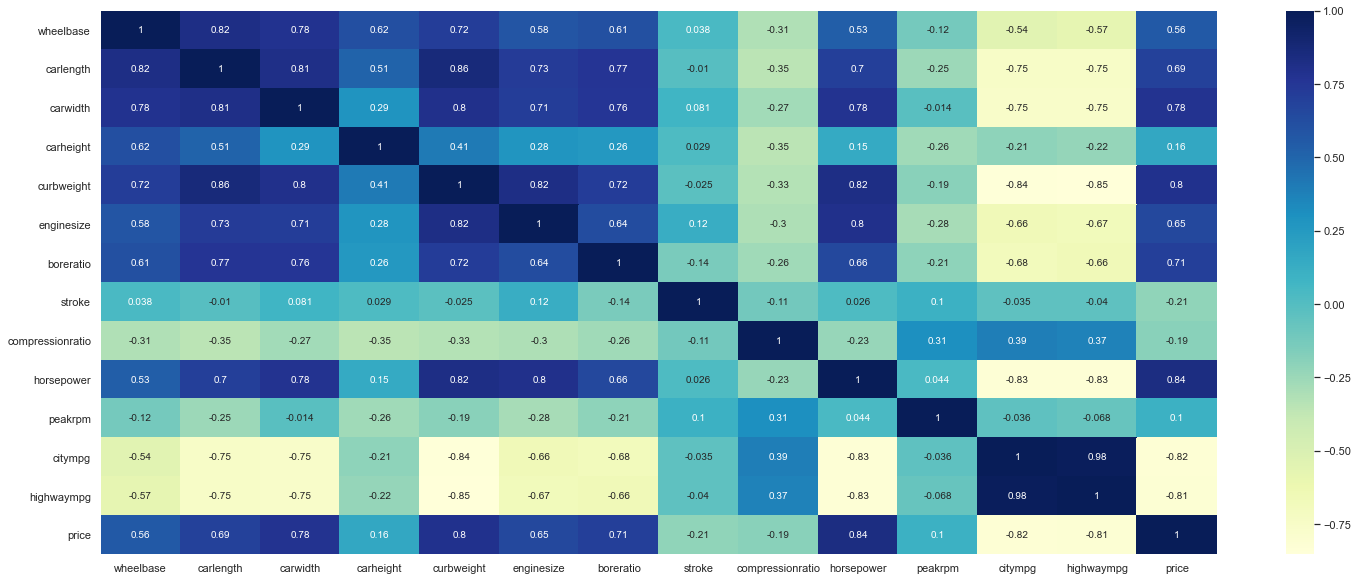

In [60]:
plt.figure(figsize = (25, 10))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [61]:
# Create X_train and y_train

# Popping out the 'price' column for y_train
y_train = df_train.pop('price') 
# Creating X_train
X_train = df_train
y_train.head()

38     0.215015
98     0.165932
180    0.597644
35     0.110583
61     0.302042
Name: price, dtype: float64

In [62]:
X_train.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
38,1,1,0,1,1,0.358696,0.421731,0.301887,0.409091,0.318213,0.360360,0.373016,1.000000,0.476190,0.226087,0.833333,0.500000,0.44,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
98,1,1,0,1,1,0.307971,0.327808,0.037736,0.409091,0.127962,0.243243,0.373016,0.677778,0.666667,0.078261,0.333333,0.681818,0.60,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
180,1,1,1,0,1,0.648551,0.795580,0.547170,0.481818,0.888287,0.909910,0.468254,0.744444,0.571429,0.834783,0.333333,0.181818,0.08,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
35,1,1,1,1,1,0.358696,0.346225,0.075472,0.518182,0.129316,0.198198,0.182540,0.811111,0.571429,0.139130,1.000000,0.636364,0.48,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
61,1,1,0,1,1,0.442029,0.611418,0.547170,0.445455,0.383209,0.468468,0.563492,0.788889,0.285714,0.208696,0.000000,0.454545,0.40,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Dealing with multicollinearity
We will follow a balanced approach by combining the automated and manual feature selection process.

Automated approcah - We will start with RFE here by selecting top "n" features.
Manual - We will fine tune our feature selection manually.
RFE

In [63]:
# Creating the model using scikit learn 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
# RFE with the number of variables 20. It will select top 20 features.
rfe = RFE(lm, 20)
ref = rfe.fit(X_train, y_train)

In [65]:
# Listing the feature variables with their RFE status and rank 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('fueltype', False, 25),
 ('aspiration', True, 1),
 ('doornumber', False, 35),
 ('drivewheel', False, 11),
 ('enginelocation', False, 36),
 ('wheelbase', True, 1),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('carheight', False, 7),
 ('curbweight', True, 1),
 ('enginesize', False, 33),
 ('boreratio', True, 1),
 ('stroke', False, 4),
 ('compressionratio', False, 10),
 ('horsepower', False, 6),
 ('peakrpm', False, 5),
 ('citympg', False, 29),
 ('highwaympg', False, 17),
 ('symboling(-1)', False, 26),
 ('symboling(0)', False, 23),
 ('symboling(1)', False, 18),
 ('symboling(2)', False, 30),
 ('symboling(3)', False, 32),
 ('carbody(hardtop)', True, 1),
 ('carbody(hatchback)', True, 1),
 ('carbody(sedan)', True, 1),
 ('carbody(wagon)', True, 1),
 ('enginetype(l)', True, 1),
 ('enginetype(ohc)', True, 1),
 ('enginetype(ohcv)', False, 22),
 ('enginetype(rotor)', True, 1),
 ('cylindernumber(four)', False, 24),
 ('cylindernumber(six)', False, 27),
 ('cylindernumber(two)', True, 1),
 ('f

In [66]:
# The top 20 features selected by the RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['aspiration', 'wheelbase', 'carwidth', 'curbweight', 'boreratio',
       'carbody(hardtop)', 'carbody(hatchback)', 'carbody(sedan)',
       'carbody(wagon)', 'enginetype(l)', 'enginetype(ohc)',
       'enginetype(rotor)', 'cylindernumber(two)', 'fuelsystem(4bbl)',
       'CarCompany(audi)', 'CarCompany(bmw)', 'CarCompany(isuzu)',
       'CarCompany(peugeot)', 'CarCompany(porsche)', 'CarCompany(volvo)'],
      dtype='object')

In [67]:
# Not selected features by RFE
X_train.columns[~rfe.support_]

Index(['fueltype', 'doornumber', 'drivewheel', 'enginelocation', 'carlength',
       'carheight', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling(-1)', 'symboling(0)',
       'symboling(1)', 'symboling(2)', 'symboling(3)', 'enginetype(ohcv)',
       'cylindernumber(four)', 'cylindernumber(six)', 'fuelsystem(2bbl)',
       'fuelsystem(mpfi)', 'fuelsystem(spfi)', 'CarCompany(chevrolet)',
       'CarCompany(dodge)', 'CarCompany(honda)', 'CarCompany(mazda)',
       'CarCompany(mercury)', 'CarCompany(mitsubishi)', 'CarCompany(nissan)',
       'CarCompany(plymouth)', 'CarCompany(saab)', 'CarCompany(toyota)',
       'CarCompany(volkswagen)'],
      dtype='object')

Building model using statsmodel for the detailed statistics
Model:-1 with all RFE variables

In [68]:
# Creating X_train dataframe with RFE selected variables
X_train_1 = X_train[rfe_cols]
X_train_1.head()

,aspiration,wheelbase,carwidth,curbweight,boreratio,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(rotor),cylindernumber(two),fuelsystem(4bbl),CarCompany(audi),CarCompany(bmw),CarCompany(isuzu),CarCompany(peugeot),CarCompany(porsche),CarCompany(volvo)
38,1,0.358696,0.301887,0.318213,0.373016,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
98,1,0.307971,0.037736,0.127962,0.373016,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
180,1,0.648551,0.547170,0.888287,0.468254,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
35,1,0.358696,0.075472,0.129316,0.182540,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
61,1,0.442029,0.547170,0.383209,0.563492,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [69]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
X_train_sm_1 = sm.add_constant(X_train_1)

In [70]:
# Creating model
lr_1 = sm.OLS(y_train, X_train_sm_1)

In [71]:
# Fit the model
lr_model_1 = lr_1.fit()

In [72]:
print('lr_model_1.summary\n\n', lr_model_1.summary())

lr_model_1.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     69.42
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.33e-36
Time:                        09:38:18   Log-Likelihood:                 125.30
No. Observations:                  86   AIC:                            -212.6
Df Residuals:                      67   BIC:                            -166.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const        

Model-1 analysis
Overall model fit

F-stats = 69.42, so the prob(F-stats) is low.

R-squared and Adj. R-squared

R-squared = 0.949
Adj. R-squared = 0.935
We can see that both R-squared and Adj. R-squared are high and closer to each other. This tells us that the extent of the fit or the percentage of variance of the data explained by the model is high.

p-values of coefficients

We can see that wheelbase p-value(0.151) is high. Let's check the VIF of the variables and make a decission for which variable to remove.

Checking VIF for Model-1

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype(l),inf
17,CarCompany(peugeot),inf
12,cylindernumber(two),inf
11,enginetype(rotor),inf
1,wheelbase,50.91
4,boreratio,24.93
2,carwidth,20.74
3,curbweight,20.15
10,enginetype(ohc),16.26
0,aspiration,15.46


Observations

We can see that there are few variables whose VIF is infinity. That indicates these variables are highly correlated with other variables. Also, there are few variables, whose VIF are very high.

We will remove the variables one by one after each model analysis by following the below manner.

High p-value and high VIF :- We will remove this first.
High p-value and low VIF :- We will remove this next. Because once we remove this variable there may be possiblity that when we again create the VIF, the VIF may become low. Because VIF is the corealtion of a variable with rest of the other variables.
Low p-value and high VIF :- Remove this variable after the ones above.
Low p-value and low VIF :- We will keep that variable.
High p-value and high VIF :- wheelbase
VIF= 50.91 and p-value = 0.151

In [74]:
#  Model:-2 Rebuilding the model without wheelbase
# Removing wheelbase
X_train_2 = X_train_1.drop('wheelbase',axis=1)

In [75]:
# Adding constant 
X_train_sm_2 = sm.add_constant(X_train_2)
# Creating and fitting the model
lr_model_2 = sm.OLS(y_train, X_train_sm_2).fit()
print('\nlr_model_2.summary\n\n',lr_model_2.summary())

print('\n\n\nlr_model_1.summary\n\n', lr_model_1.summary())


lr_model_2.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     72.21
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.07e-36
Time:                        09:38:24   Log-Likelihood:                 123.97
No. Observations:                  86   AIC:                            -211.9
Df Residuals:                      68   BIC:                            -167.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const       

Model-2 analysis
Overall model fit

F-stats = 72.21 (slightly increased from Model-1 69.42)
Prob(F-stats) is slightly decreased.
The overall model fit is significant.
R-squared and Adj. R-squared

R-squared = 0.948 (No significant change from Model-1)
Adj. R-squared = 0.934 (No significant change from Model-1)
Both are closer to each other.
p-values of coefficients

High p-values
fuelsystem(4bbl) = 0.072
boreratio = 0.061
Checking VIF for Model-2

In [76]:
# Create VIF for Model-2
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,enginetype(l),inf
16,CarCompany(peugeot),inf
11,cylindernumber(two),inf
10,enginetype(rotor),inf
3,boreratio,24.50
2,curbweight,18.94
1,carwidth,16.84
9,enginetype(ohc),15.54
0,aspiration,15.43
6,carbody(sedan),9.14


In [77]:
# Model:-3 Rebuilding the model without boreratio
# Removing boreratio
X_train_3 = X_train_2.drop('boreratio',axis=1)

In [78]:
# Adding constant 
X_train_sm_3 = sm.add_constant(X_train_3)
# Creating and fitting the model
lr_model_3 = sm.OLS(y_train, X_train_sm_3).fit()
print('\nlr_model_3.summary\n\n',lr_model_3.summary())

print('\n\nlr_model_2.summary\n\n',lr_model_2.summary())

print('\n\n\nlr_model_1.summary\n\n', lr_model_1.summary())


lr_model_3.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     73.68
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           7.02e-37
Time:                        09:38:28   Log-Likelihood:                 121.73
No. Observations:                  86   AIC:                            -209.5
Df Residuals:                      69   BIC:                            -167.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const       

Model-3 analysis
Overall model fit

F-stats = 118.7 (slightly increased from Model-2)
Prob(F-stats) is slightly decreased.
The overall model fit is significant.
R-squared and Adj. R-squared

R-squared = 0.945 (No significant change from Model-2)
Adj. R-squared = 0.932 (No change from Model-2)
Both are closer to each other.
p-values of coefficients

High p-values fuelsystem(4bbl) = 0.072

In [79]:
# Checking VIF for Model-3
# Create VIF for Model-3
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype(rotor),inf
7,enginetype(l),inf
15,CarCompany(peugeot),inf
10,cylindernumber(two),inf
0,aspiration,15.18
1,carwidth,15.03
2,curbweight,14.19
8,enginetype(ohc),10.95
5,carbody(sedan),8.90
4,carbody(hatchback),8.25


In [80]:
# Model:-4 Rebuilding the model without fuelsystem(4bbl)
# Removing fuelsystem(4bbl)
X_train_4 = X_train_3.drop('fuelsystem(4bbl)',axis=1)

In [81]:
# Adding constant 
X_train_sm_4 = sm.add_constant(X_train_4)
# Creating model
lr_model_4 = sm.OLS(y_train, X_train_sm_4).fit()
print('\nlr_model_4.summary\n\n',lr_model_4.summary())

print('\nlr_model_3.summary\n\n',lr_model_3.summary())

print('\n\nlr_model_2.summary\n\n',lr_model_2.summary())


lr_model_4.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     75.83
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.95e-37
Time:                        09:38:33   Log-Likelihood:                 119.69
No. Observations:                  86   AIC:                            -207.4
Df Residuals:                      70   BIC:                            -168.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const       

Model-4 analysis
Overall model fit

F-stats = 75.83 (slightly increased from Model-3)
Prob(F-stats) is slightly decreased.
The overall model fit is significant.
R-squared and Adj. R-squared

R-squared = 0.942 (No significant change from Model-3)
Adj. R-squared = 0.930 (No change from Model-3)
Both are closer to each other.
p-values of coefficients

High p-values
enginetype(rotor) = 0.156
cylindernumber(two) = 0.156
CarCompany(isuzu) = 0.051
Checking VIF for Model-4

In [82]:
# Create VIF for Model-4
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginetype(l),inf
14,CarCompany(peugeot),inf
10,cylindernumber(two),inf
9,enginetype(rotor),inf
0,aspiration,15.17
1,carwidth,15.00
2,curbweight,14.15
8,enginetype(ohc),10.95
5,carbody(sedan),8.90
4,carbody(hatchback),8.25


In [83]:
# Model-5 Rebuilding the model without enginetype(rotor)
# Removing enginetype(rotor)
X_train_5 = X_train_4.drop('enginetype(rotor)',axis=1)

In [84]:
# Adding constant 
X_train_sm_5 = sm.add_constant(X_train_5)
# Creating model
lr_model_5 = sm.OLS(y_train, X_train_sm_5).fit()
print('\nlr_model_5.summary\n\n',lr_model_5.summary())

print('\nlr_model_4.summary\n\n',lr_model_4.summary())


lr_model_5.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     75.83
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.95e-37
Time:                        09:38:36   Log-Likelihood:                 119.69
No. Observations:                  86   AIC:                            -207.4
Df Residuals:                      70   BIC:                            -168.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const       

In [86]:
# Checking VIF for Model-5
# Create VIF for Model-5
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginetype(l),inf
13,CarCompany(peugeot),inf
0,aspiration,15.17
1,carwidth,15.00
2,curbweight,14.15
8,enginetype(ohc),10.95
5,carbody(sedan),8.90
4,carbody(hatchback),8.25
6,carbody(wagon),3.25
3,carbody(hardtop),2.08


In [87]:
# Model-6 Rebuilding the model without cylindernumber(two)
# Removing cylindernumber(two)
X_train_6 = X_train_5.drop('cylindernumber(two)',axis=1)
# Adding constant 
X_train_sm_6 = sm.add_constant(X_train_6)
# Creating model
lr_model_6 = sm.OLS(y_train, X_train_sm_6).fit()
print('\nlr_model_6.summary\n\n',lr_model_6.summary())

print('\nlr_model_5.summary\n\n',lr_model_5.summary())


lr_model_6.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     79.92
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.18e-37
Time:                        09:39:08   Log-Likelihood:                 118.45
No. Observations:                  86   AIC:                            -206.9
Df Residuals:                      71   BIC:                            -170.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const       

Model-6 analysis
Overall model fit

F-stats = 79.92. Increased from the provious model
Prob(F-stats) is decreased.
The overall model fit is more significant than previous model.
R-squared and Adj. R-squared

R-squared = 0.940 (No significant change from previous model)
Adj. R-squared = 0.929 (No significant change from previous model)
Both are closer to each other.
p-values of coefficients

High p-values
No such variables.

In [88]:
# Create VIF for Model-6
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginetype(l),inf
12,CarCompany(peugeot),inf
1,carwidth,14.60
0,aspiration,14.01
2,curbweight,13.50
5,carbody(sedan),8.78
8,enginetype(ohc),8.49
4,carbody(hatchback),7.80
6,carbody(wagon),3.15
3,carbody(hardtop),2.05


In [89]:
# Model-7 Rebuilding the model without enginetype(l)
# Removing enginetype(l)
X_train_7 = X_train_6.drop('enginetype(l)',axis=1)

In [90]:
# Adding constant 
X_train_sm_7 = sm.add_constant(X_train_7)
# Creating model
lr_model_7 = sm.OLS(y_train, X_train_sm_7).fit()
print('\nlr_model_7.summary\n\n',lr_model_7.summary())

print('\n\nlr_model_6.summary\n\n',lr_model_6.summary())


lr_model_7.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     79.92
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.18e-37
Time:                        09:39:13   Log-Likelihood:                 118.45
No. Observations:                  86   AIC:                            -206.9
Df Residuals:                      71   BIC:                            -170.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const       

Model-7 analysis
Not much change from Model-6.

In [91]:
# Create VIF for Model-7
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,14.60
0,aspiration,14.01
2,curbweight,13.50
5,carbody(sedan),8.78
7,enginetype(ohc),8.49
4,carbody(hatchback),7.80
6,carbody(wagon),3.15
3,carbody(hardtop),2.05
13,CarCompany(volvo),2.01
11,CarCompany(peugeot),1.45


In [92]:
# Model-8 Rebuilding the model without carwidth
# Removing carwidth
X_train_8 = X_train_7.drop('carwidth',axis=1)
# Adding constant 
X_train_sm_8 = sm.add_constant(X_train_8)
# Creating model
lr_model_8 = sm.OLS(y_train, X_train_sm_8).fit()
print('\nlr_model_8.summary\n\n',lr_model_8.summary())

print('\nlr_model_7.summary\n\n',lr_model_7.summary())


lr_model_8.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     75.79
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.36e-36
Time:                        09:39:18   Log-Likelihood:                 112.77
No. Observations:                  86   AIC:                            -197.5
Df Residuals:                      72   BIC:                            -163.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const       

Model-8 analysis
Overall model fit

F-stats = 75.79 . decreased from the provious model.
Prob(F-stats) has decreased.
The overall model fit is better than previous one but not as much significant as previous other models.
R-squared and Adj. R-squared

R-squared = 0.932 (Slightly decreased from previous model)
Adj. R-squared = 0.920 (Slightly decreased from previous model)
Both are closer to each other.
p-values of coefficients

High p-values
CarCompany(isuzu) = 0.160
CarCompany(peugeot) = 0.084

In [93]:
# Create VIF for Model-8
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,aspiration,12.11
6,enginetype(ohc),8.48
4,carbody(sedan),7.41
3,carbody(hatchback),6.40
1,curbweight,4.45
5,carbody(wagon),3.13
2,carbody(hardtop),1.93
12,CarCompany(volvo),1.58
10,CarCompany(peugeot),1.22
7,CarCompany(audi),1.11


High p-value and low VIF :- CarCompany(isuzu)
VIF = 1.04 p-value = 0.160

Model-9 Rebuilding the model without CarCompany(isuzu)

In [94]:
# Removing CarCompany(isuzu)
X_train_9 = X_train_8.drop('CarCompany(isuzu)',axis=1)
# Adding constant 
X_train_sm_9 = sm.add_constant(X_train_9)
# Creating model
lr_model_9 = sm.OLS(y_train, X_train_sm_9).fit()
print('\nlr_model_9.summary\n\n',lr_model_9.summary())

print('\n\nlr_model_8.summary\n\n',lr_model_8.summary())


lr_model_9.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     80.81
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.96e-37
Time:                        09:39:24   Log-Likelihood:                 111.58
No. Observations:                  86   AIC:                            -197.2
Df Residuals:                      73   BIC:                            -165.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const       

Model-9 analysis
Overall model fit

F-stats = 80.81 . Increased from the provious model.
Prob(F-stats) has decreased.
The overall model fit is better than previous one.
R-squared and Adj. R-squared

R-squared = 0.930 (No significant change from previous model)
Adj. R-squared = 0.918 (No significant change from previous model)
Both are closer to each other.
p-values of coefficients

High p-values
CarCompany(peugeot) = 0.88

In [95]:
# Create VIF for Model-9
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,aspiration,12.11
6,enginetype(ohc),8.42
4,carbody(sedan),7.41
3,carbody(hatchback),6.40
1,curbweight,4.43
5,carbody(wagon),3.12
2,carbody(hardtop),1.92
11,CarCompany(volvo),1.57
9,CarCompany(peugeot),1.22
7,CarCompany(audi),1.10


High p-value and low VIF :- CarCompany(peugeot)
VIF = 1.22 p-value = 0.88

Model-10 Rebuilding the model without CarCompany(peugeot)

In [96]:
# Removing CarCompany(peugeot)
X_train_10 = X_train_9.drop('CarCompany(peugeot)',axis=1)
# Adding constant 
X_train_sm_10 = sm.add_constant(X_train_10)
# Creating model
lr_model_10 = sm.OLS(y_train, X_train_sm_10).fit()
print('\nlr_model_10.summary\n\n',lr_model_10.summary())

print('\n\nlr_model_9.summary\n\n',lr_model_9.summary())


lr_model_10.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     85.58
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.78e-37
Time:                        09:39:28   Log-Likelihood:                 109.85
No. Observations:                  86   AIC:                            -195.7
Df Residuals:                      74   BIC:                            -166.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const      

Model-10 analysis
Overall model fit

F-stats = 85.58 . Increased from the provious model.
Prob(F-stats) has decreased.
The overall model fit is better than previous one.
R-squared and Adj. R-squared

R-squared = 0.927 (No significant change from previous model)
Adj. R-squared = 0.916 (No significant change from previous model)
Both are closer to each other.
p-values of coefficients

High p-values
No such variables.

In [97]:
# Create VIF for Model-10
vif = pd.DataFrame()
vif['Features'] = X_train_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,aspiration,12.09
6,enginetype(ohc),8.17
4,carbody(sedan),7.38
3,carbody(hatchback),6.38
1,curbweight,4.40
5,carbody(wagon),2.93
2,carbody(hardtop),1.92
10,CarCompany(volvo),1.56
7,CarCompany(audi),1.10
8,CarCompany(bmw),1.08


In [98]:
# Model-11 Rebuilding the model without aspiration
# Removing aspiration
X_train_11 = X_train_10.drop('aspiration',axis=1)
# Adding constant 
X_train_sm_11 = sm.add_constant(X_train_11)
# Creating model
lr_model_11 = sm.OLS(y_train, X_train_sm_11).fit()
print('\nlr_model_11.summary\n\n',lr_model_11.summary())

print('\nlr_model_10.summary\n\n',lr_model_10.summary())


lr_model_11.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     56.58
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           7.58e-31
Time:                        09:39:30   Log-Likelihood:                 89.484
No. Observations:                  86   AIC:                            -157.0
Df Residuals:                      75   BIC:                            -130.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const      

Model-11 analysis
Overall model fit

F-stats = 56.58 . Reduced from the previous model.
Prob(F-stats) has increased.
The overall model fit is not better than previous one.
R-squared and Adj. R-squared

R-squared = 0.883 (Reduced from previous model)
Adj. R-squared = 0.867 (Reduced from previous model)
Both are closer to each other.
p-values of coefficients

High p-values
No such variables

In [99]:
# Create VIF for Model-11
vif = pd.DataFrame()
vif['Features'] = X_train_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_11.values, i) for i in range(X_train_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,enginetype(ohc),6.91
3,carbody(sedan),5.72
2,carbody(hatchback),4.76
0,curbweight,4.08
4,carbody(wagon),2.52
1,carbody(hardtop),1.76
9,CarCompany(volvo),1.36
6,CarCompany(audi),1.10
7,CarCompany(bmw),1.08
8,CarCompany(porsche),1.07


In [100]:
# Model-12 Rebuilding the model without enginetype(ohc)
# Removing enginetype(ohc)
X_train_12 = X_train_11.drop('enginetype(ohc)',axis=1)
# Adding constant 
X_train_sm_12 = sm.add_constant(X_train_12)
# Creating model
lr_model_12 = sm.OLS(y_train, X_train_sm_12).fit()
print('\nlr_model_12.summary\n\n',lr_model_12.summary())

print('\n\n\nlr_model_11.summary\n\n',lr_model_11.summary())


lr_model_12.summary

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     46.94
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.84e-27
Time:                        09:39:33   Log-Likelihood:                 78.116
No. Observations:                  86   AIC:                            -136.2
Df Residuals:                      76   BIC:                            -111.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const      

Model-12 analysis
Overall model fit

F-stats = 46.94 . Reduced from the provious model.
Prob(F-stats) has increased.
The overall model fit is better than previous one.
R-squared and Adj. R-squared

R-squared = 0.848 (Reduced from previous model)
Adj. R-squared = 0.829 (Reduced from previous model)
Both are closer to each other.
p-values of coefficients

High p-values
No such variables.

In [101]:
# Create VIF for Model-12
vif = pd.DataFrame()
vif['Features'] = X_train_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_12.values, i) for i in range(X_train_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,3.32
3,carbody(sedan),1.87
4,carbody(wagon),1.52
2,carbody(hatchback),1.48
8,CarCompany(volvo),1.33
1,carbody(hardtop),1.13
5,CarCompany(audi),1.09
6,CarCompany(bmw),1.07
7,CarCompany(porsche),1.06


In [102]:
# Step 4:- Residual analysis
#Prediction on the training data
#Recall the error resoduals are calculated on training data
#here also we just use model.predict(Dataframe)
# Finding y_train prediction
y_train_pred = lr_model_12.predict(X_train_sm_12)

Assumption
The residuals or error terms should be normally distributed.

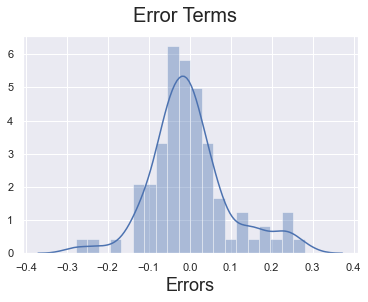

In [103]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [104]:
# Residual
residual = y_train - y_train_pred

Assumption
Error terms are independent of each other. There should not be any pattern in the error terms.

Text(0, 0.5, 'residual')

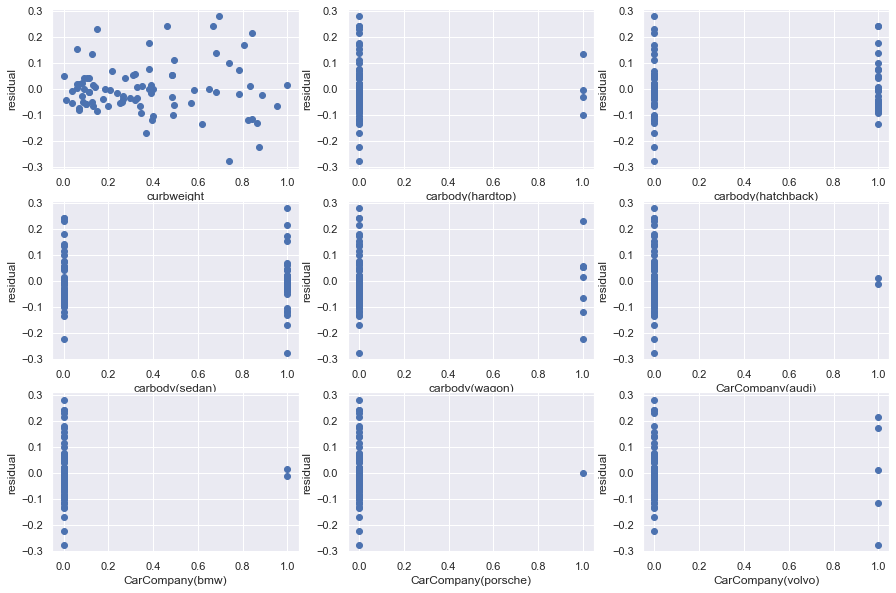

In [105]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.scatter(X_train_12['curbweight'], residual)
plt.xlabel('curbweight')
plt.ylabel('residual')
plt.subplot(3,3,2)
plt.scatter(X_train_12['carbody(hardtop)'], residual)
plt.xlabel('carbody(hardtop)')
plt.ylabel('residual')
plt.subplot(3,3,3)
plt.scatter(X_train_12['carbody(hatchback)'], residual)
plt.xlabel('carbody(hatchback)')
plt.ylabel('residual')
plt.subplot(3,3,4)
plt.scatter(X_train_12['carbody(sedan)'], residual)
plt.xlabel('carbody(sedan)')
plt.ylabel('residual')
plt.subplot(3,3,5)
plt.scatter(X_train_12['carbody(wagon)'], residual)
plt.xlabel('carbody(wagon)')
plt.ylabel('residual')
plt.subplot(3,3,6)
plt.scatter(X_train_12['CarCompany(audi)'], residual)
plt.xlabel('CarCompany(audi)')
plt.ylabel('residual')
plt.subplot(3,3,7)
plt.scatter(X_train_12['CarCompany(bmw)'], residual)
plt.xlabel('CarCompany(bmw)')
plt.ylabel('residual')
plt.subplot(3,3,8)
plt.scatter(X_train_12['CarCompany(porsche)'], residual)
plt.xlabel('CarCompany(porsche)')
plt.ylabel('residual')
plt.subplot(3,3,9)
plt.scatter(X_train_12['CarCompany(volvo)'], residual)
plt.xlabel('CarCompany(volvo)')
plt.ylabel('residual')

Stpe 5:- Predictions and evaluation on the test set
We have to scale the variables in the test set similar to what we have done in the train set. Otherwise the predictions result will not be reliable. Because, the test set has the actual values in the variables and the train set has the scaled values in the variables.

We don't fit scaler on the test set. We only transform the test set.
The test set is an unseen data. Though, we have the test set now, may be in future some other datapoints will be added to the testset or a new testset will come. So, we can not get any particular Xmin or Xmax from the testset. Hence, we don't fit the scaler on the testset. Rather, we use the fit of the train set.

In [106]:
# Scale the test set variables with min-max scaler

# Transform the data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
22,1,1,0,1,1,0.257246,0.233886,0.037736,0.181818,0.038592,0.180180,0.230159,0.611111,0.666667,0.069565,0.583333,0.681818,0.64,0.057322,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
181,1,1,1,0,1,0.648551,0.795580,0.547170,0.481818,0.901828,0.819820,0.468254,0.744444,0.571429,0.834783,0.333333,0.136364,0.08,0.601126,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
171,1,1,0,0,1,0.427536,0.581952,0.377358,0.290909,0.605958,0.684685,0.746032,0.911111,0.619048,0.486957,0.000000,0.363636,0.32,0.357392,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
107,1,1,1,0,1,0.771739,0.775322,0.905660,0.718182,0.813135,0.450450,0.619048,0.566667,0.190476,0.321739,0.166667,0.136364,0.08,0.377756,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
150,1,1,0,1,1,0.329710,0.259669,0.000000,0.518182,0.112390,0.198198,0.293651,0.388889,0.476190,0.017391,0.000000,0.863636,0.68,-0.002379,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [107]:
df_test.describe()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
count,37.0,37.0,37.000000,37.000000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.0,37.0,37.000000,37.000000,37.000000,37.000000,37.0,37.0,37.000000,37.000000,37.0,37.0,37.000000,37.000000,37.000000,37.000000
mean,1.0,1.0,0.594595,0.621622,1.0,0.427438,0.544672,0.380418,0.493120,0.439880,0.440467,0.490991,0.666817,0.503218,0.325734,0.370495,0.411548,0.345946,0.338180,0.081081,0.324324,0.297297,0.189189,0.081081,0.0,0.351351,0.486486,0.162162,0.054054,0.810811,0.054054,0.027027,0.810811,0.108108,0.027027,0.351351,0.027027,0.540541,0.0,0.027027,0.0,0.0,0.027027,0.108108,0.054054,0.216216,0.0,0.0,0.108108,0.054054,0.0,0.0,0.054054,0.162162,0.108108,0.081081
std,0.0,0.0,0.497743,0.491672,0.0,0.166974,0.185558,0.332338,0.203859,0.285150,0.247149,0.196998,0.174382,0.193605,0.246382,0.288137,0.237629,0.210231,0.240673,0.276725,0.474579,0.463373,0.397061,0.276725,0.0,0.483978,0.506712,0.373684,0.229243,0.397061,0.229243,0.164399,0.397061,0.314800,0.164399,0.483978,0.164399,0.505228,0.0,0.164399,0.0,0.0,0.164399,0.314800,0.229243,0.417342,0.0,0.0,0.314800,0.229243,0.0,0.0,0.229243,0.373684,0.314800,0.276725
min,1.0,1.0,0.000000,0.000000,1.0,0.170290,0.208103,-0.339623,0.072727,0.037238,0.000000,0.190476,0.388889,0.000000,0.017391,0.000000,0.045455,0.040000,-0.011256,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,0.000000,0.000000,1.0,0.286232,0.421731,0.113208,0.409091,0.138795,0.198198,0.373016,0.522222,0.476190,0.086957,0.166667,0.136364,0.200000,0.116384,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.0,1.000000,1.000000,1.0,0.387681,0.567219,0.377358,0.481818,0.410291,0.369369,0.404762,0.655556,0.476190,0.321739,0.333333,0.363636,0.320000,0.322349,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.0,1.000000,1.000000,1.0,0.500000,0.709024,0.622642,0.627273,0.635748,0.630631,0.619048,0.800000,0.619048,0.469565,0.583333,0.636364,0.480000,0.587201,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000

In [108]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
fueltype,37.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
aspiration,37.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
doornumber,37.0,0.594595,0.497743,0.000000,0.000000,1.000000,1.000000,1.000000
drivewheel,37.0,0.621622,0.491672,0.000000,0.000000,1.000000,1.000000,1.000000
enginelocation,37.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
wheelbase,37.0,0.427438,0.166974,0.170290,0.286232,0.387681,0.500000,0.815217
carlength,37.0,0.544672,0.185558,0.208103,0.421731,0.567219,0.709024,0.813996
carwidth,37.0,0.380418,0.332338,-0.339623,0.113208,0.377358,0.622642,1.000000
carheight,37.0,0.493120,0.203859,0.072727,0.409091,0.481818,0.627273,0.936364
curbweight,37.0,0.439880,0.285150,0.037238,0.138795,0.410291,0.635748,0.901828


In [109]:
# Create X_test and y_test

# Popping out the 'price' column for y_test
y_test = df_test.pop('price')

# Creating X_test
X_test = df_test

#

In [110]:
# We have to drop the variables, which we dropped in the train set upon the p-value and VIF calculations

# Taking only the columns from the final model.
X_test = X_test[X_train_12.columns]
X_test.head()

,curbweight,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),CarCompany(audi),CarCompany(bmw),CarCompany(porsche),CarCompany(volvo)
22,0.038592,0,1,0,0,0,0,0,0
181,0.901828,0,0,0,1,0,0,0,0
171,0.605958,0,1,0,0,0,0,0,0
107,0.813135,0,0,1,0,0,0,0,0
150,0.112390,0,1,0,0,0,0,0,0


In [111]:
# Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,curbweight,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),CarCompany(audi),CarCompany(bmw),CarCompany(porsche),CarCompany(volvo)
22,1.0,0.038592,0,1,0,0,0,0,0,0
181,1.0,0.901828,0,0,0,1,0,0,0,0
171,1.0,0.605958,0,1,0,0,0,0,0,0
107,1.0,0.813135,0,0,1,0,0,0,0,0
150,1.0,0.112390,0,1,0,0,0,0,0,0


In [112]:
# Predict the model on the test set
y_test_pred = lr_model_12.predict(X_test_sm)

In [114]:
# Evaluate the model
# Evaluate the model with r-squared on the test set
r2 = r2_score(y_test, y_test_pred)
r2

0.7448989756264016

Conclusion
R-squared on the test set = 0.74
R-squared on the train set = 0.82
We can see that there is 0.08 difference between the R-Squared of the train and test set. That means, what the model has learnt on the train set, it is not generalise well in the test set. The model seems to be overfitted with the train data. But the R-Squared of the test set 0.74 is not a poor result. The model is able to explain 74% variance of the data in the test set. The model accuracy can be improved further by making it more generalise.

Text(0, 0.5, 'y_test_pred')

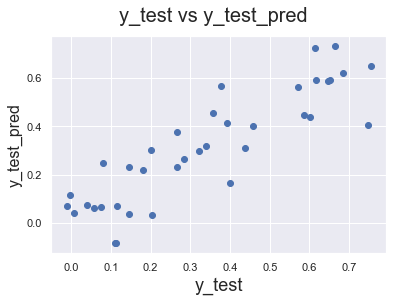

In [115]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_test_pred', fontsize=16)  

Model equation
price=0.1915+0.6885×curbweight+0.3788×CarCompany(bmw)+0.2357×CarCompany(audi)+0.4813×CarCompany(porsche)+0.1993×CarCompany(volvo)−0.2496×carbody(hardtop)−0.1551×carbody(hatchback)−0.1840×carbody(sedan)−0.3733×carbody(wagon)

Observations from the model equation
𝑐𝑢𝑟𝑏𝑤𝑒𝑖𝑔ℎ𝑡 have positive coefficients.
The highest coefficient is for curbweight (0.6885). That means, the price increases more with the curbweight. For, one unit curbweight increases the price increases 0.6885 units.
carbody hardtop, seadn, hatchback and wagon are categorical variables, which have negative coefficients. That means, the price decreases if the car has mentioned carbody.
CarCompany BMW, Audi, Porsche and Volvo are categorical variables, which are positively corelated with price. That means, if the car belongs to any of the mentioned category then the price will increase.
Overall it is a decent model, but with the acknowledgement that the model could be better.

We could make a better model by following below:-

Add new features or derived features.
Build a non-linear model.